# Titanic Dataset EDA

### Import Libraries Required 

In [1]:
# import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import libraries for data preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# import libraries for saving the model
import joblib
# import libraries for handling warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
# Load dataset
df = pd.read_csv('train.csv')
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**First 5 rows**: This shows the structure of the dataset with all 12 columns including PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, and our target variable Survived. We can see the data types and sample values.

### Initial Data Exploration

In [3]:
# Check the data types, missing values, and basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Info Output**: This displays column names, non-null counts, and data types. We can see that Age and Cabin have missing values (null counts), with Age missing 177 values and Cabin missing 687 values out of 891 total rows. This helps identify which columns need imputation or removal.

.info() tells that the data have some missing values and three types of data types, where 2 columns are float, 5 integer & 5 categorical types.

In [4]:
# statistical summary of numerical variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Numerical Features Summary**: This provides statistical measures (count, mean, std, min, 25%, 50%, 75%, max) for all numerical columns. Key insights: average age is ~29.7 years, average fare is ~32.2, and about 38% of passengers survived. SibSp and Parch values are mostly small numbers.

In [5]:
# statistical summary of categorical variables with unique counts
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


**Categorical Features Summary**: This shows the count and unique values for categorical columns. Pclass has 3 unique values, Sex has 2 (Male/Female), and Embarked has 3 ports (S, C, Q). This reveals the categories we'll need to encode for modeling.

## Dealing with Missing Values

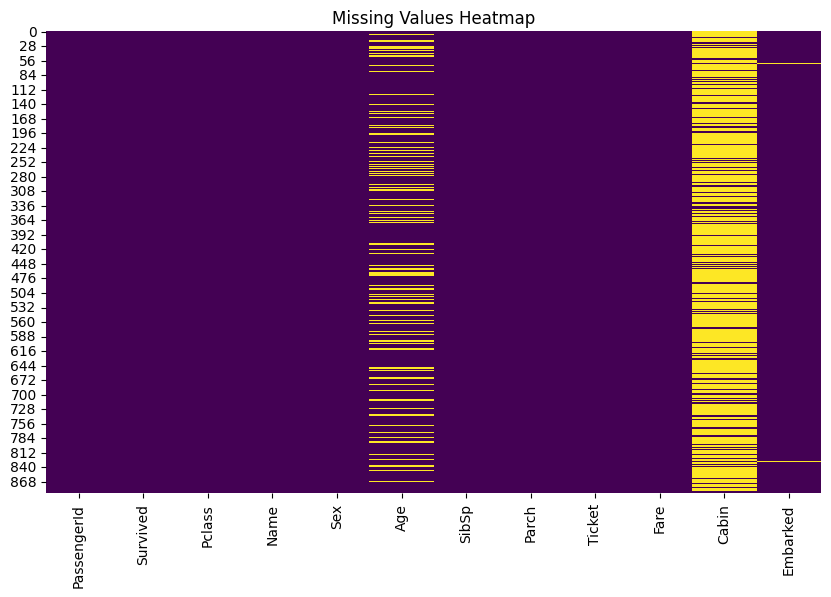

In [6]:
# make graph of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Missing Values Heatmap**: The viridis color scale shows the distribution of missing values across the dataset. White/light areas indicate missing values - clearly visible columns are Cabin (almost entirely white/missing) and Age (some white streaks). This visualization confirms we need to handle these columns carefully.

In [7]:
# count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Missing Values Count**: This quantifies the missing values: Age has 177 missing values and Embarked has 2. Cabin has 687 missing values (77% of the data), making it unsuitable for analysis and should be dropped.

In [8]:
# cabin has too many missing values, dropping it along with other non-useful columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [9]:
# replace missing age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)
# replace missing embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
# again check for missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Missing Values After Imputation**: All missing values have been successfully handled - Age was filled with the median value and Embarked was filled with the mode (most frequent port). The dataset now has no missing values and is ready for further analysis.

## Checking data distribution

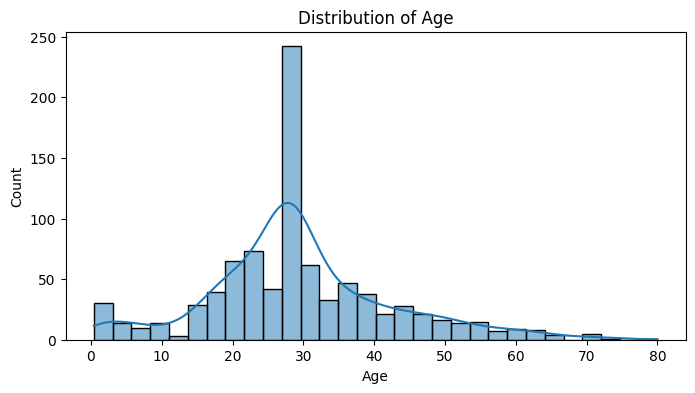

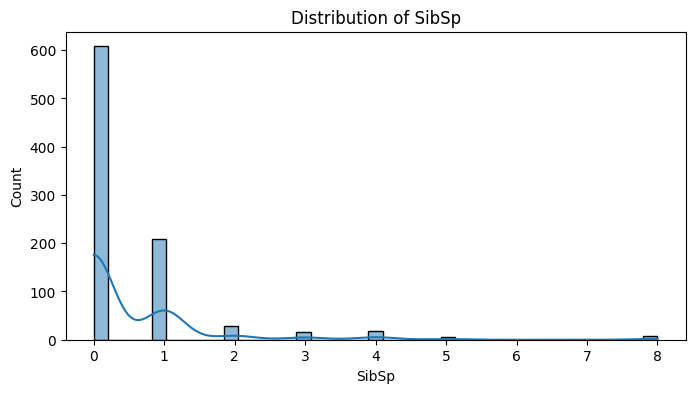

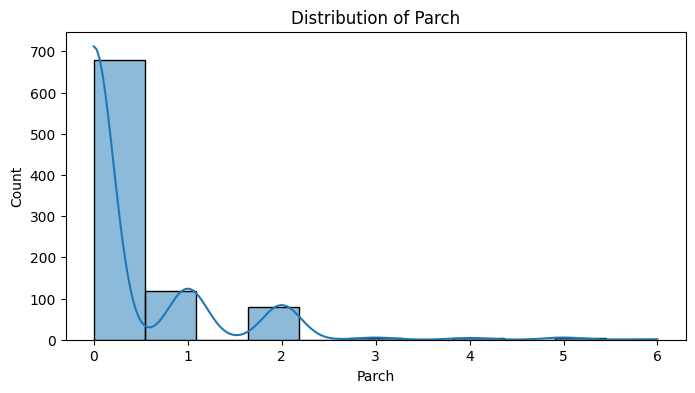

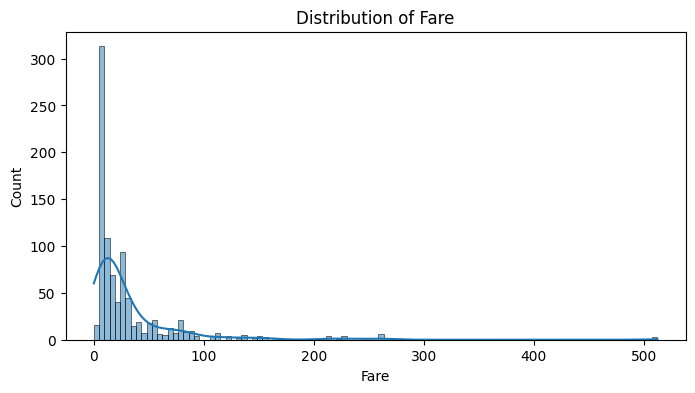

In [11]:
# numerical features distribution plots
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Numerical Features Distributions**: These histograms show how each numerical variable is distributed. Age and Fare appear right-skewed (tail on right), while SibSp and Parch are heavily concentrated on the left with fewer values as numbers increase. The KDE curves help visualize the overall distribution shape.

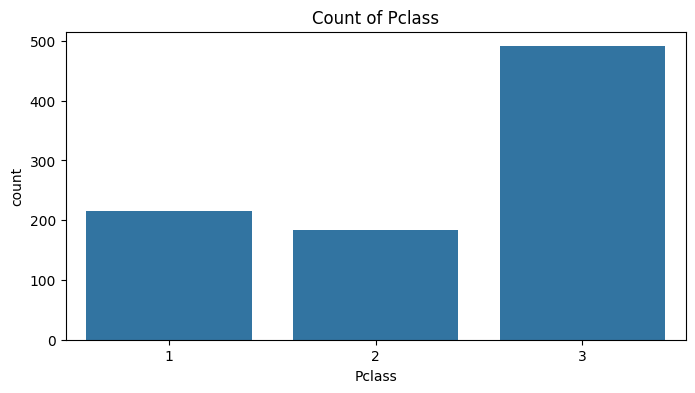

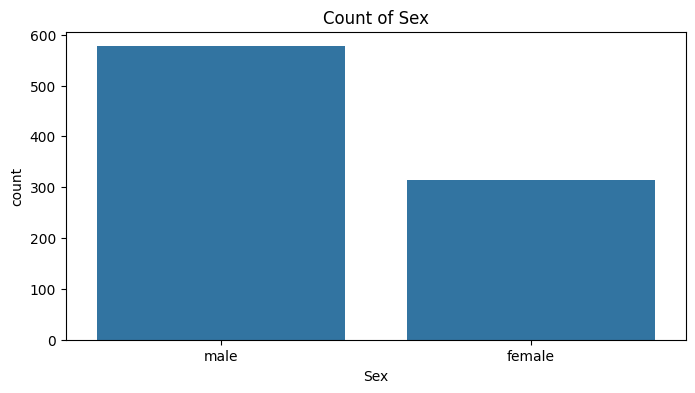

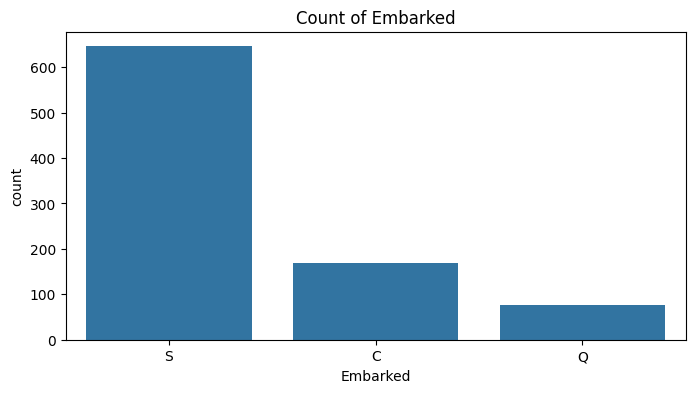

In [12]:
# categorical features count plots
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()

**Categorical Features Distributions**: Count plots show the frequency of each category. Pclass is fairly balanced across 1-3, Sex shows more males than females, and Embarked is dominated by port S (Southampton) with fewer passengers from C (Cherbourg) and Q (Queenstown). This class imbalance may affect model training.

## Dealing Outliers

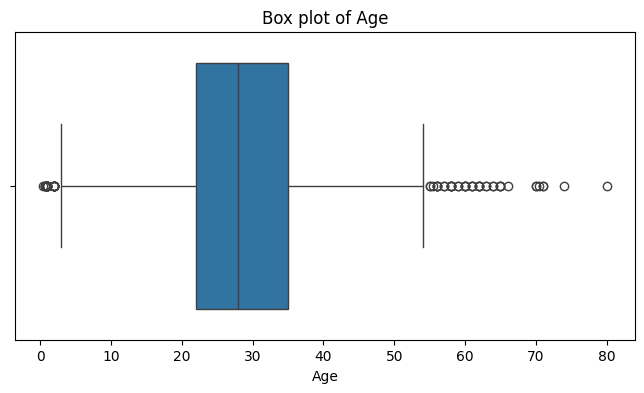

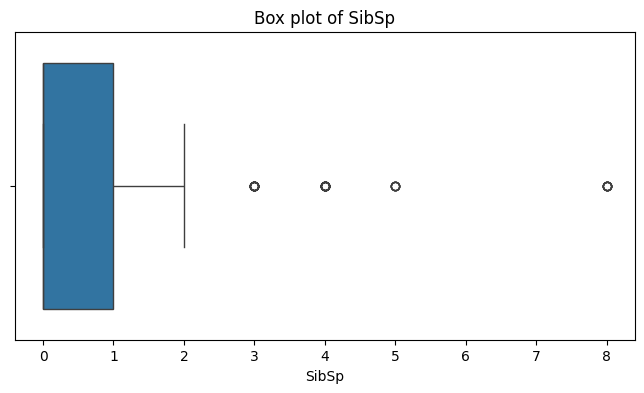

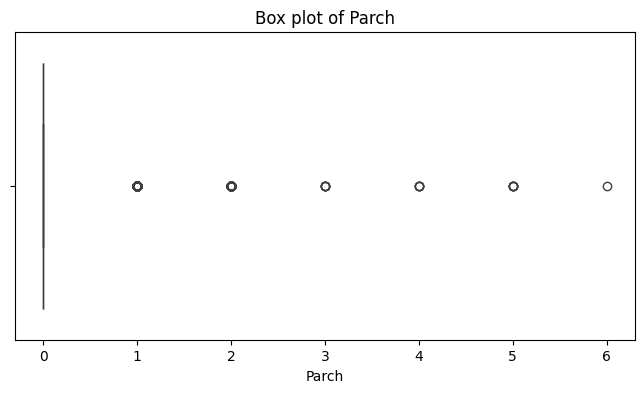

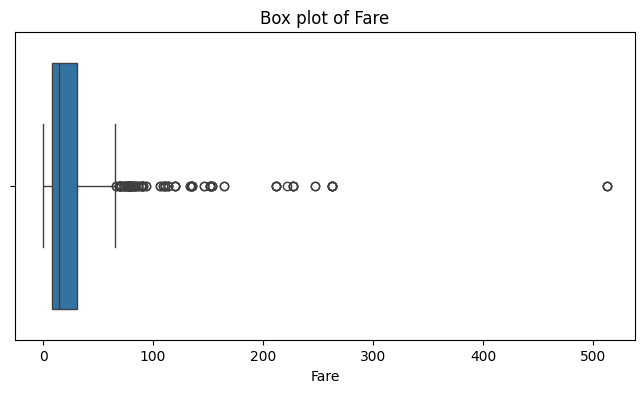

In [13]:
# find outliers in numerical features using box plots
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

**Box Plots Before Outlier Removal**: These box plots reveal outliers (points beyond the whiskers) in the numerical features. Age has a few low outliers, while Fare has many extreme high-value outliers. These outliers can skew model predictions and should be removed using the IQR (Interquartile Range) method.

In [14]:
# remove outliers from 'Fare' & Age using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

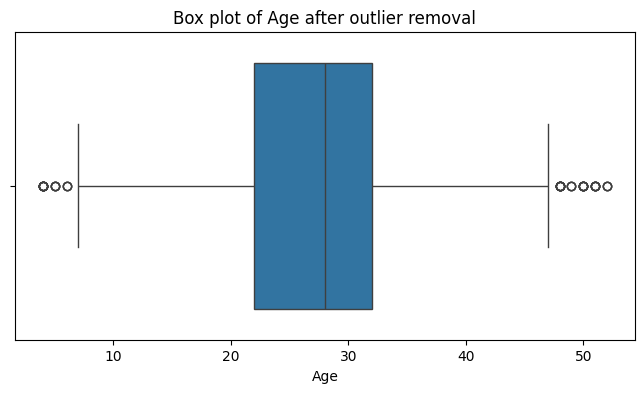

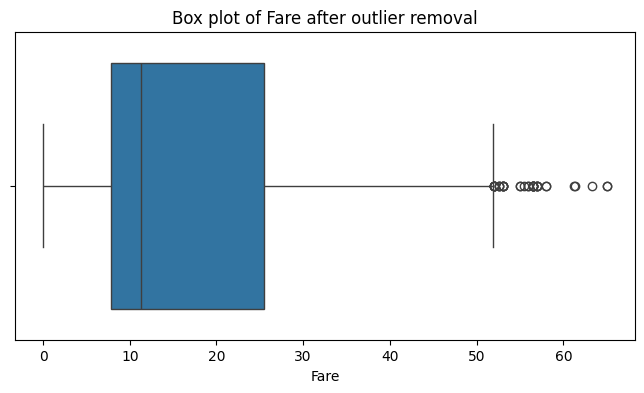

In [15]:
# box plots after outlier removal
for feature in ['Age', 'Fare']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature} after outlier removal')
    plt.show()

**Box Plots After Outlier Removal**: After applying the IQR method (removing values beyond 1.5*IQR), the extreme outliers have been eliminated from both Age and Fare columns. The boxes and whiskers are now more compact, representing a cleaner dataset with less extreme variation. The dataset is now more suitable for model training.

## Get insight of the data

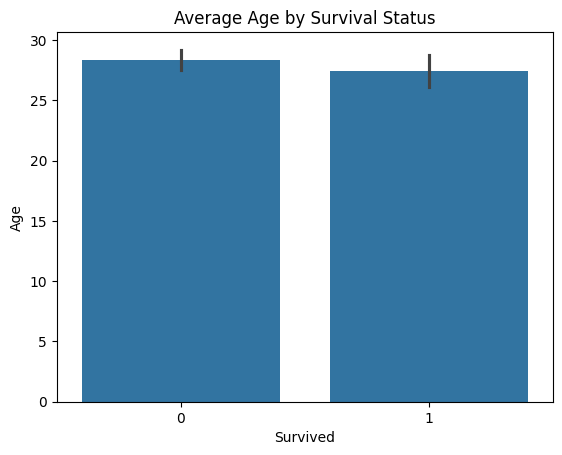

In [16]:
# plot between survived by age
sns.barplot(x='Survived', y='Age', data=df)
plt.title('Average Age by Survival Status')
plt.show()

**Average Age by Survival**: The bar plot compares average age between survivors (Survived=1) and non-survivors (Survived=0). Children and younger passengers had a higher survival rate on average compared to older passengers, suggesting age was a significant survival factor on the Titanic.

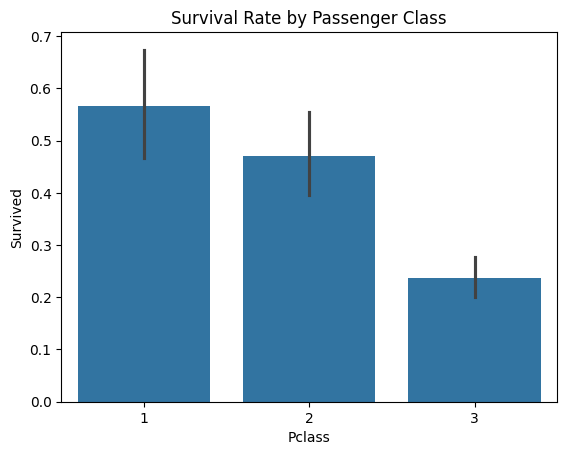

In [17]:
# survival by Class 
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

**Survival Rate by Passenger Class**: This bar plot clearly shows that first-class passengers (Pclass=1) had the highest survival rate, followed by second-class (Pclass=2), and third-class passengers had the lowest survival rate. Class was a strong predictor of survival, likely due to access to lifeboats and better accommodations.

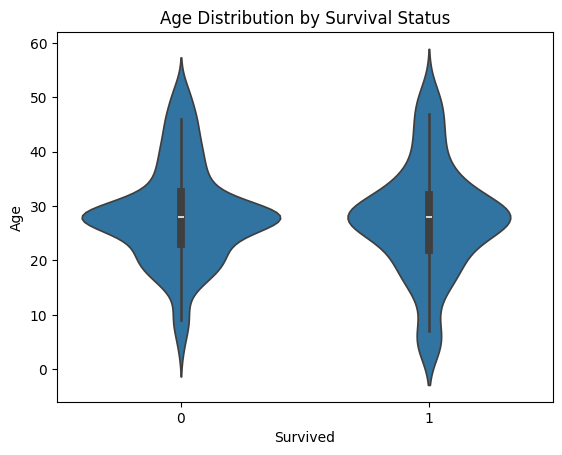

In [18]:
# age vs survival
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

**Age Distribution by Survival Status**: The violin plot shows the probability density of ages for survivors vs. non-survivors. Survivors have a distribution skewed towards younger ages (wider base at lower ages), while non-survivors have a more uniform age distribution. This confirms that younger passengers were prioritized in evacuation.

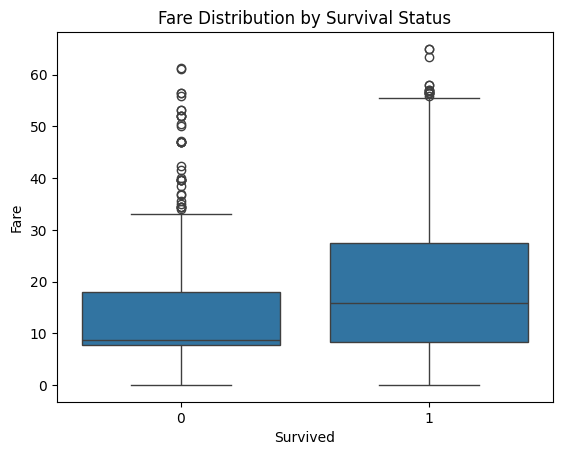

In [19]:
# fare vs survival box plot
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.show()

**Fare Distribution by Survival Status**: The box plot reveals that survivors generally paid higher fares than non-survivors, with a higher median and wider range. This suggests that passengers who could afford higher fares (typically first-class) were more likely to survive, reinforcing the relationship between ticket price/class and survival chances.

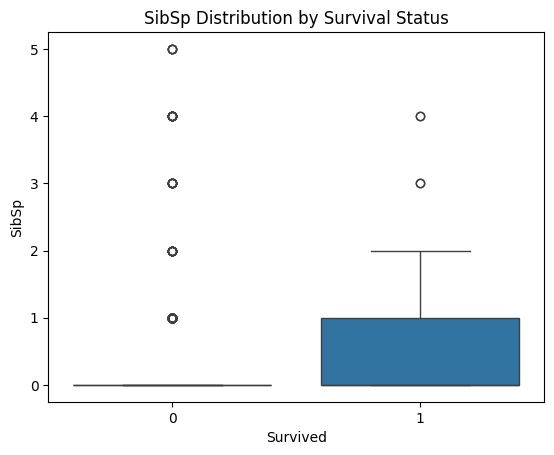

In [20]:
# SibSp & parch vs survival box plot
sns.boxplot(x='Survived', y='SibSp', data=df)
plt.title('SibSp Distribution by Survival Status')
plt.show()

**SibSp Distribution by Survival Status**: This box plot shows the number of siblings/spouses aboard for survivors vs. non-survivors. The distributions are similar with most values concentrated at 0-1, suggesting that traveling alone or with one family member was most common. SibSp alone may be less predictive than other features but could be important in combination with others.

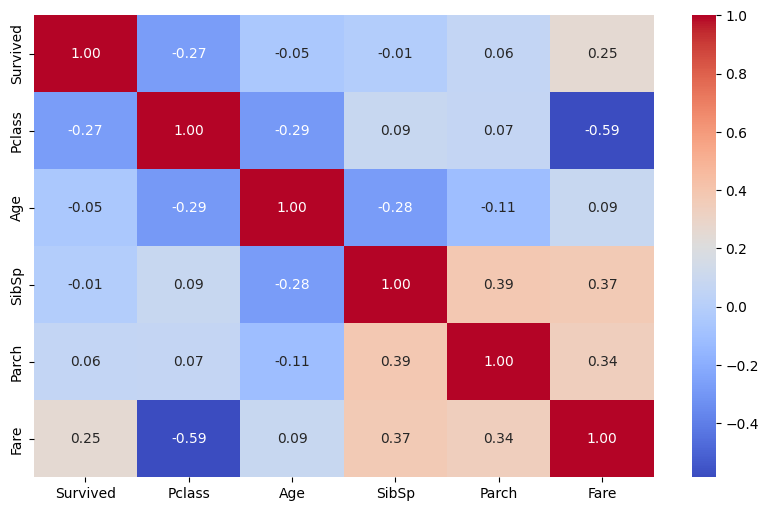

In [21]:
# corelation heatmap of numerical features only 
plt.figure(figsize=(10,6))
numerical_features = df.select_dtypes(include=[np.number])
corr = numerical_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Correlation Heatmap**: This heatmap reveals relationships between numerical features. Key correlations with Survived: Pclass shows a negative correlation (-0.34), indicating higher class numbers (lower status) correlate with lower survival. Age shows weak negative correlation (-0.08), and Fare shows positive correlation (0.26). Most features have weak correlations with each other, suggesting they provide independent information for modeling.